### Importing Necessary Library

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Reading DataSet

In [235]:
df=pd.read_csv("data_science_job.csv")

### Sanity Check of Data and Exploratory Data Analysis(EDA) 

In [17]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [27]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2.0,NaN,NaN,127.0,0.0


In [29]:
df.shape

(19158, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [33]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [35]:
round(df.isnull().sum()/df.shape[0]*100)

enrollee_id                0.0
city                       0.0
city_development_index     3.0
gender                    24.0
relevent_experience        0.0
enrolled_university        2.0
education_level            2.0
major_discipline          15.0
experience                 0.0
company_size              31.0
company_type              32.0
training_hours             4.0
target                     0.0
dtype: float64

In [37]:
df.duplicated("enrollee_id").sum()

0

In [39]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64
******************************
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
******************************
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
******************************
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
******************************
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
******************************
major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts              

In [41]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [43]:
df.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
count,19158,14650,19158,18772,18698,16345,13220,13018
unique,123,3,2,3,5,6,8,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
freq,4355,13221,13792,13817,11598,14492,3083,9817


In [45]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
training_hours            float64
target                    float64
dtype: object

In [47]:
numeric_columns = df.select_dtypes(include="number")
print(numeric_columns)

       enrollee_id  city_development_index  experience  training_hours  target
0             8949                   0.920        20.0            36.0     1.0
1            29725                   0.776        15.0            47.0     0.0
2            11561                   0.624         5.0            83.0     0.0
3            33241                   0.789         0.0            52.0     1.0
4              666                   0.767        20.0             8.0     0.0
...            ...                     ...         ...             ...     ...
19153         7386                   0.878        14.0            42.0     1.0
19154        31398                   0.920        14.0            52.0     1.0
19155        24576                   0.920        20.0            44.0     0.0
19156         5756                   0.802         0.0            97.0     0.0
19157        23834                   0.855         2.0           127.0     0.0

[19158 rows x 5 columns]


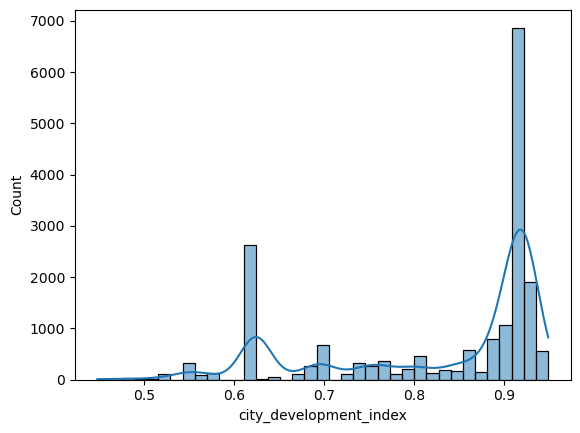

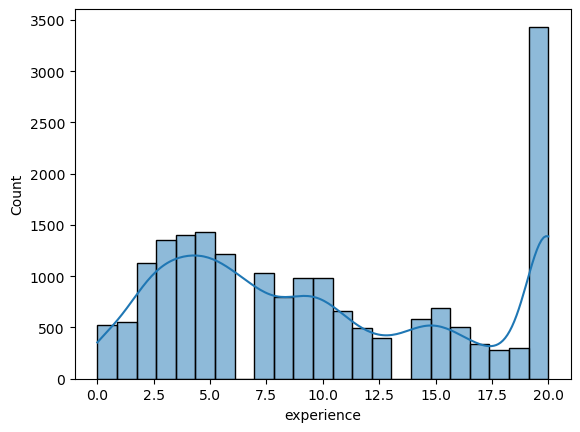

In [49]:
warnings.filterwarnings("ignore")
for i in ["city_development_index","experience"]:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

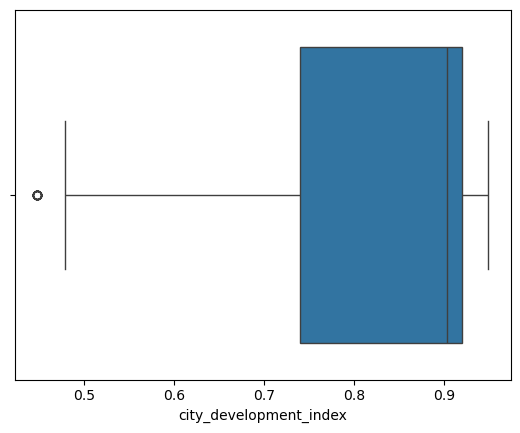

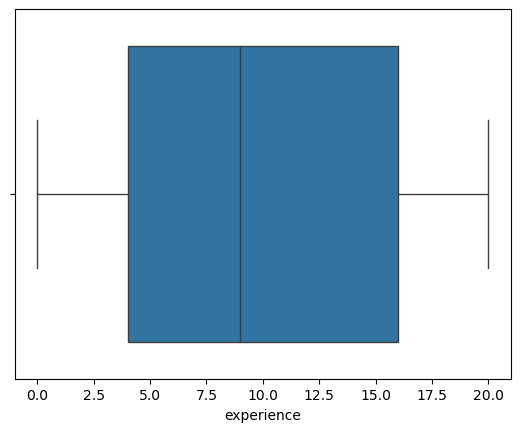

In [50]:
warnings.filterwarnings("ignore")
for i in ["city_development_index","experience"]:
    sns.boxplot(data=df,x=i)
    plt.show()

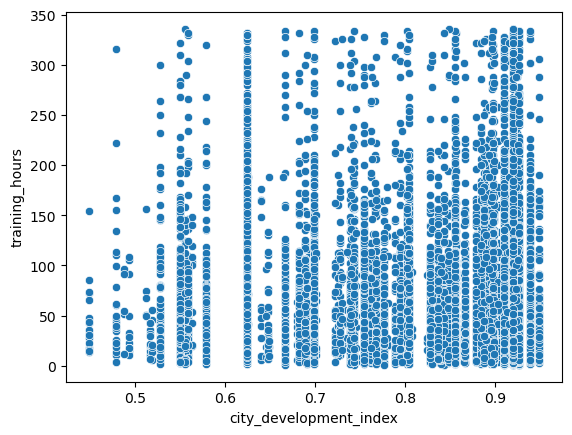

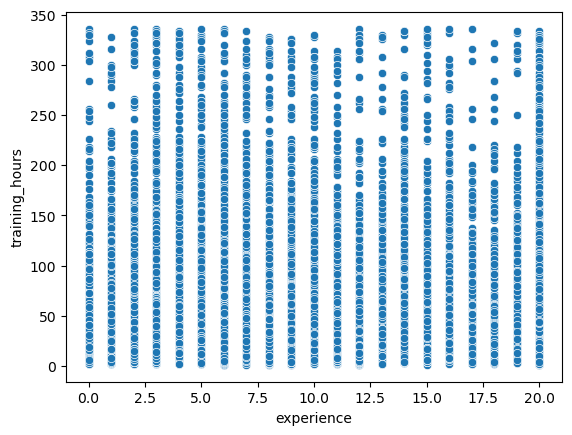

In [51]:
warnings.filterwarnings("ignore")
for i in ["city_development_index","experience"]:
    sns.scatterplot(data=df,x=i,y="training_hours")
    plt.show()

In [57]:
df.select_dtypes(include="number").corr()

,enrollee_id,city_development_index,experience,training_hours,target
enrollee_id,1.000000,-0.039557,-0.036147,0.002263,0.049475
city_development_index,-0.039557,1.000000,0.333050,-0.002083,-0.340239
experience,-0.036147,0.333050,1.000000,-0.000815,-0.178238
training_hours,0.002263,-0.002083,-0.000815,1.000000,-0.021706
target,0.049475,-0.340239,-0.178238,-0.021706,1.000000


<Axes: >

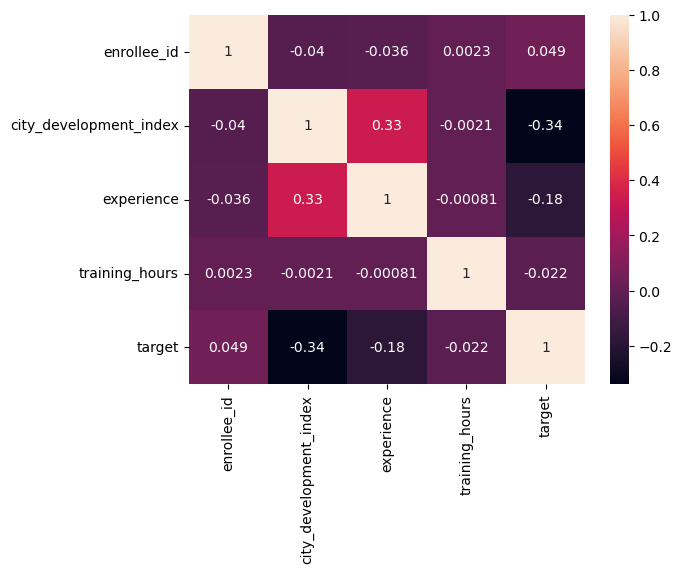

In [59]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)

### Missing Value Treatment

In [62]:
df["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [64]:
mode_value = df['gender'].mode()[0]  # Get the most frequent value
df['gender']=df['gender'].fillna(mode_value)

In [66]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [68]:
print(df["city_development_index"].describe().round(2))
skewness = ((3 * (df["city_development_index"].mean() - df["city_development_index"].median())) / df["city_development_index"].std()).round(2)
if skewness == 0:
    print("It is Normally Distributed")
elif skewness > 0.5:
    print("The data is right-skewed")
else:
    print("The data is left-skewed")
Q1 = df['city_development_index'].quantile(0.25)
Q3 = df['city_development_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound:", lower_bound.round(2))
print("upper_bound:", upper_bound.round(2)) 

count    18679.00
mean         0.83
std          0.12
min          0.45
25%          0.74
50%          0.90
75%          0.92
max          0.95
Name: city_development_index, dtype: float64
The data is left-skewed
lower_bound: 0.47
upper_bound: 1.19


Text(0, 0.5, 'Frequency')

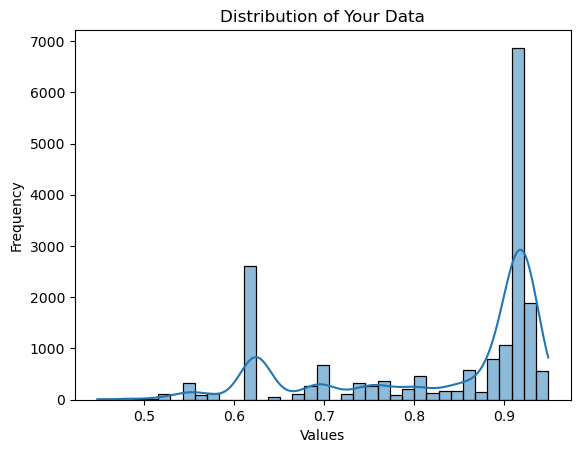

In [70]:
sns.histplot(df['city_development_index'], kde=True)
plt.title("Distribution of Your Data")
plt.xlabel("Values")
plt.ylabel("Frequency")

In [71]:
median_value = df['city_development_index'].median()
df['city_development_index']=df['city_development_index'].fillna(median_value)

In [74]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [76]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [78]:
df["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [80]:
print(df['enrolled_university'].value_counts())
print(f"Missing values in 'enrolled_university': {df['enrolled_university'].isnull().sum()}")

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
Missing values in 'enrolled_university': 386


In [82]:
mode_value = df['enrolled_university'].mode()[0]
df['enrolled_university']=df['enrolled_university'].fillna(mode_value)

In [84]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [86]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [88]:
mode_value = df['enrolled_university'].mode()[0]
df['enrolled_university']=df['enrolled_university'].fillna(mode_value)

In [90]:
mode_value = df['education_level'].mode()[0]
df['education_level']=df['education_level'].fillna(mode_value)

In [242]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [94]:
print(df["experience"].describe().round(2))
skewness = ((3 * (df["experience"].mean() - df["experience"].median())) / df["experience"].std()).round(2)
if skewness == 0:
    print("It is Normally Distributed")
elif skewness > 0.5:
    print("The data is right-skewed")
else:
    print("The data is left-skewed")
Q1 = df['experience'].quantile(0.25)
Q3 = df['experience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound:", lower_bound.round(2))
print("upper_bound:", upper_bound.round(2)) 

count    19093.00
mean         9.93
std          6.51
min          0.00
25%          4.00
50%          9.00
75%         16.00
max         20.00
Name: experience, dtype: float64
The data is left-skewed
lower_bound: -14.0
upper_bound: 34.0


In [96]:
median_value = df['experience'].median()
df['experience']=df['experience'].fillna(median_value)

In [98]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [100]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [102]:
df.drop(columns=['company_size', 'company_type'], inplace=True)

In [104]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,47.0,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,83.0,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,8.0,0.0


In [106]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
training_hours             766
target                       0
dtype: int64

In [108]:
print(df["training_hours"].describe().round(2))
skewness = ((3 * (df["training_hours"].mean() - df["training_hours"].median())) / df["training_hours"].std()).round(2)
if skewness == 0:
    print("It is Normally Distributed")
elif skewness > 0.5:
    print("The data is right-skewed")
else:
    print("The data is left-skewed")
Q1 = df['experience'].quantile(0.25)
Q3 = df['experience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound:", lower_bound.round(2))
print("upper_bound:", upper_bound.round(2)) 

count    18392.00
mean        65.19
std         59.89
min          1.00
25%         23.00
50%         47.00
75%         88.00
max        336.00
Name: training_hours, dtype: float64
The data is right-skewed
lower_bound: -14.0
upper_bound: 34.0


In [110]:
median_value = df['training_hours'].median()
df['training_hours']=df['training_hours'].fillna(median_value)

In [288]:

df['training_hours_log'] = np.log1p(df['training_hours'])

In [290]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,training_hours_log
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0,3.610918
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0,3.871201
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0,4.430817
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0,3.970292
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0,2.197225


In [116]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
training_hours               0
target                       0
training_hours_log           0
dtype: int64

In [118]:
mode_value = df['major_discipline'].mode()[0]
df['major_discipline']=df['major_discipline'].fillna(mode_value)

In [120]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
training_hours            0
target                    0
training_hours_log        0
dtype: int64

In [122]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,target,training_hours_log
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,36.0,1.0,3.610918
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,47.0,0.0,3.871201
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,83.0,0.0,4.430817
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,52.0,1.0,3.970292
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,8.0,0.0,2.197225


### Outlier Treatment

In [131]:
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw, uw
cdi = df["city_development_index"]
lw, uw = whisker(cdi)
cdi_capped = np.where(cdi < lw, lw, cdi)
cdi_capped = np.where(cdi_capped > uw, uw, cdi_capped)
df["city_development_index"] = cdi_capped
print(df["city_development_index"].describe())

count    19158.000000
mean         0.830829
std          0.122252
min          0.477500
25%          0.743000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


<Axes: xlabel='city_development_index'>

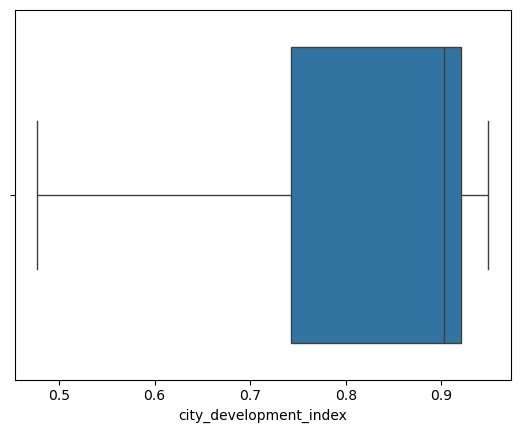

In [133]:
sns.boxplot(data=df,x=df["city_development_index"])

In [238]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

### Data Visualization

In [256]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [262]:
percentage = df['gender'].value_counts(normalize=True) * 100
print(percentage)

gender
Male      90.245734
Female     8.450512
Other      1.303754
Name: proportion, dtype: float64


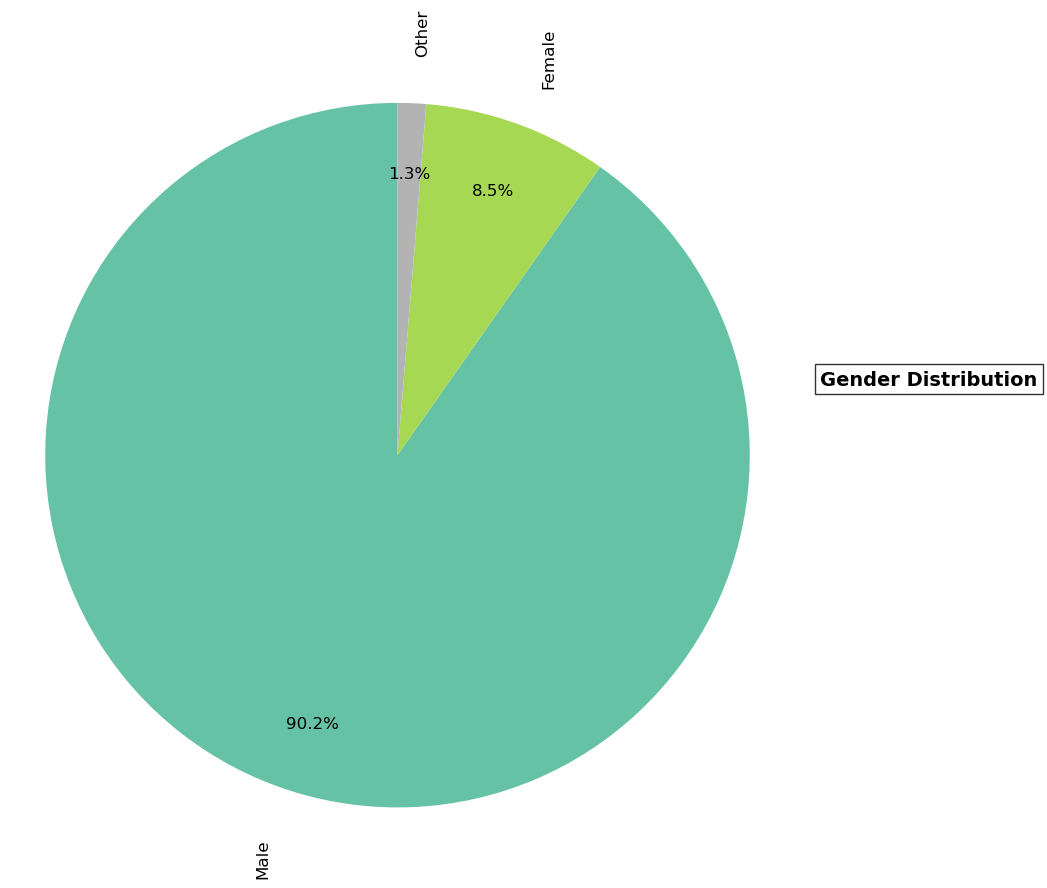

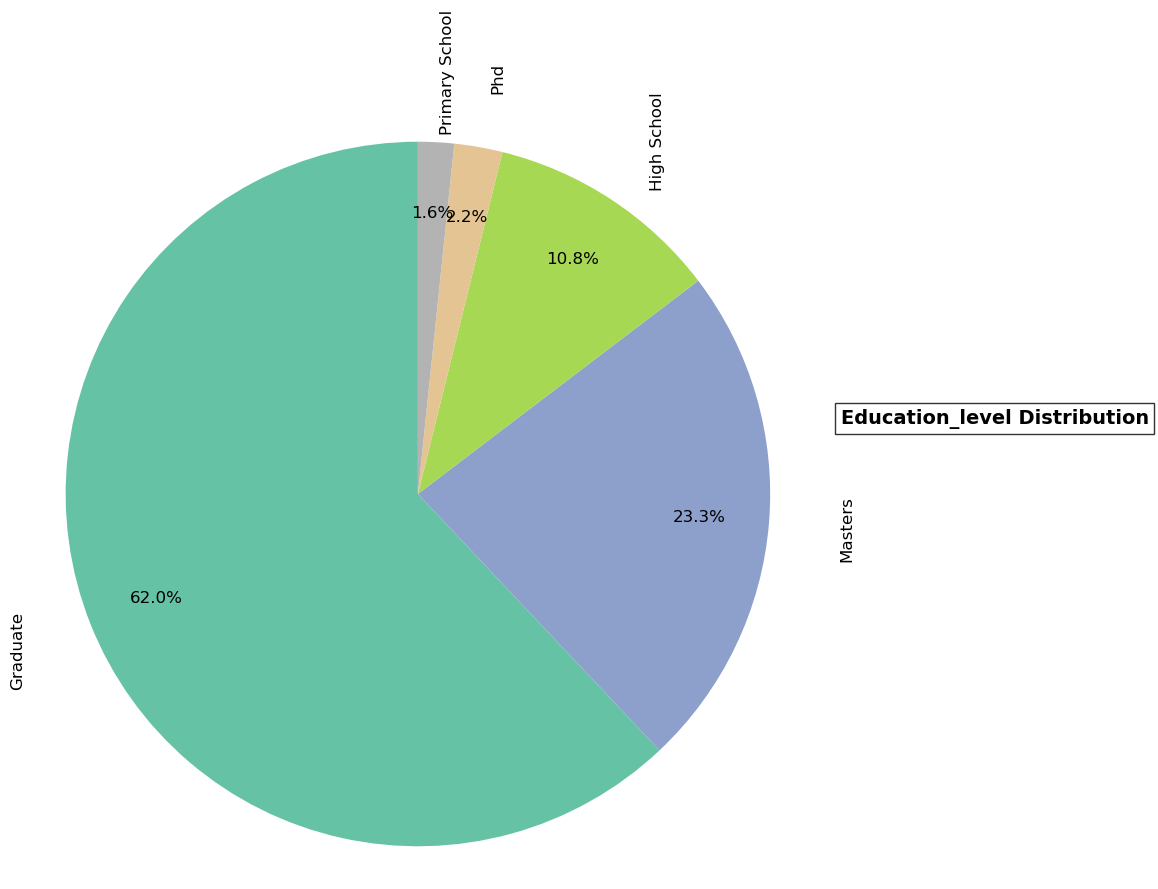

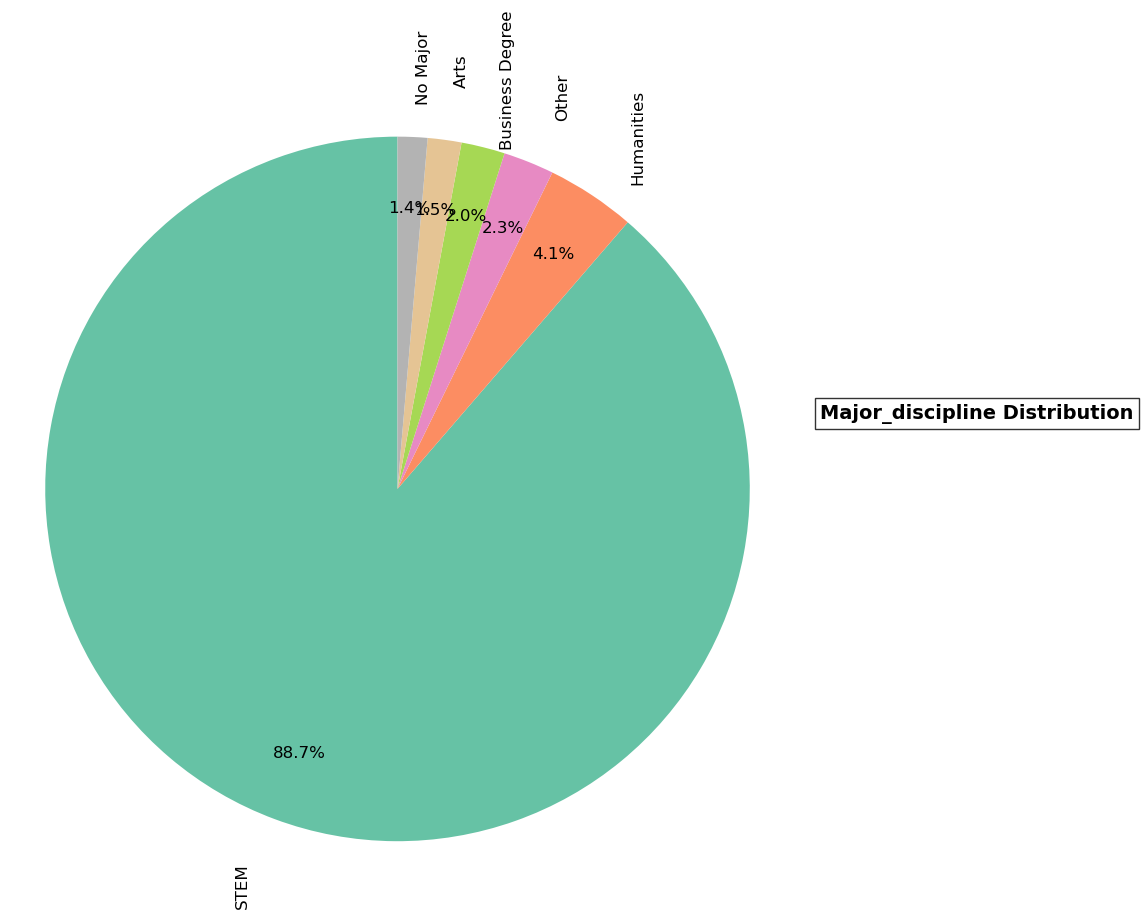

In [280]:
for i in ['gender', 'education_level', 'major_discipline']:
    gender_counts = df[i].value_counts()
    labels = gender_counts.index
    sizes = gender_counts.values
    colors = plt.cm.get_cmap('Set2', len(sizes)).colors
    fig, ax = plt.subplots(figsize=(10, 10))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                      startangle=90, pctdistance=0.8, 
                                      labeldistance=1.2, colors=colors, textprops={'fontsize': 12})
    for text in texts:
        text.set_rotation(90)
        text.set_verticalalignment('center')
    plt.text(1.2, 0.2, f"{i.capitalize()} Distribution", fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))
    plt.axis('equal')
    plt.show()


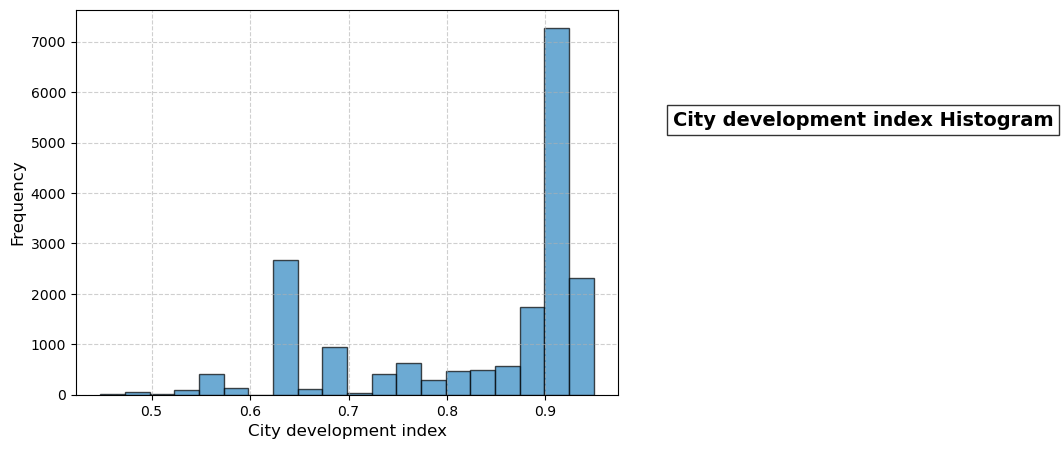

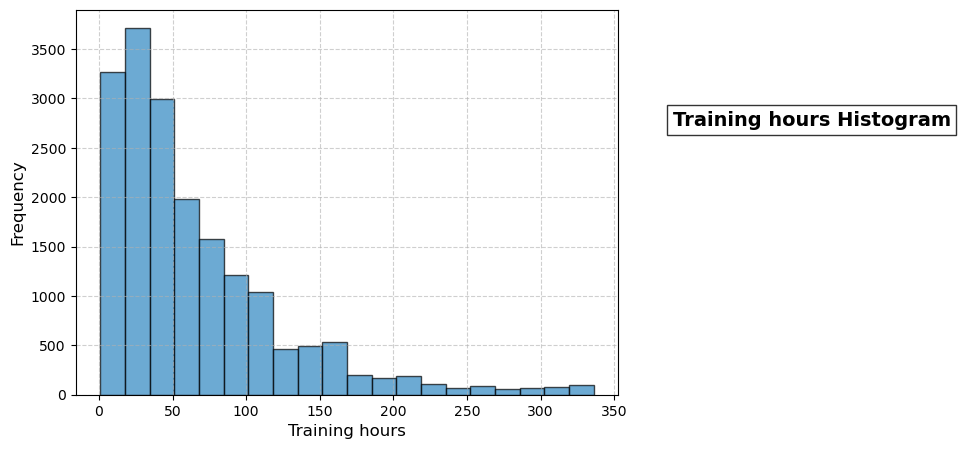

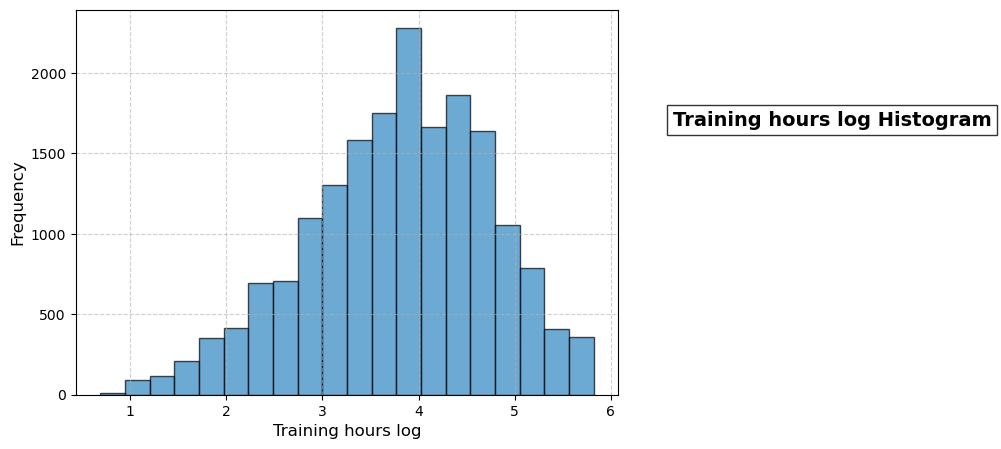

In [296]:
import matplotlib.pyplot as plt
import pandas as pd

# List of histogram columns
hist_cols = ['city_development_index', 'training_hours', 'training_hours_log']

for col in hist_cols:
    plt.figure(figsize=(7, 5))
    plt.hist(df[col], bins=20, color='#2e86c1', edgecolor='black', alpha=0.7)

    # Title on Right Side
    plt.text(1.1, 0.7, f"{col.replace('_', ' ').capitalize()} Histogram", fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8), transform=plt.gca().transAxes)
    
    # Label Names
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


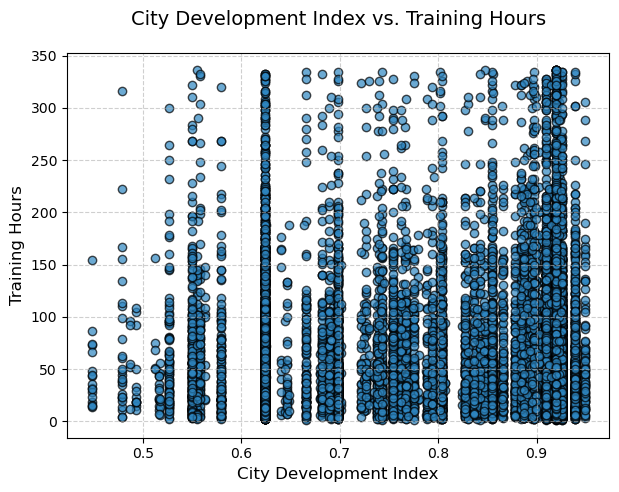

In [302]:
plt.figure(figsize=(7, 5))
plt.scatter(df['city_development_index'], df['training_hours'], color='#2e86c1', alpha=0.7, edgecolors='black')
plt.title("City Development Index vs. Training Hours", fontsize=14,pad=20)
plt.xlabel("City Development Index", fontsize=12)
plt.ylabel("Training Hours", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Figure size 700x500 with 0 Axes>

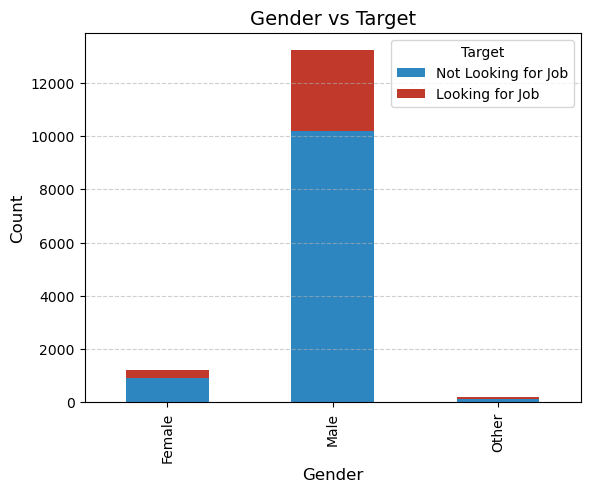

<Figure size 800x500 with 0 Axes>

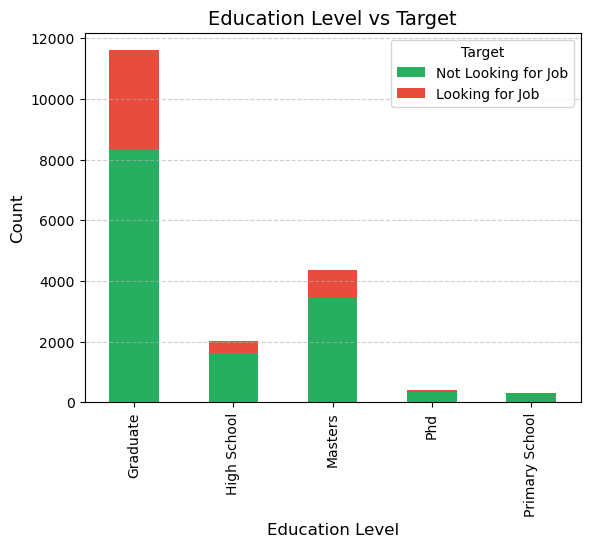

In [308]:
plt.figure(figsize=(7, 5))
gender_counts = pd.crosstab(df['gender'], df['target'])
gender_counts.plot(kind='bar', stacked=True, color=['#2e86c1', '#c0392b'])
plt.title("Gender vs Target", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Target", labels=["Not Looking for Job", "Looking for Job"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
plt.figure(figsize=(8, 5))
edu_counts = pd.crosstab(df['education_level'], df['target'])
edu_counts.plot(kind='bar', stacked=True, color=['#27ae60', '#e74c3c'])
plt.title("Education Level vs Target", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Target", labels=["Not Looking for Job", "Looking for Job"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

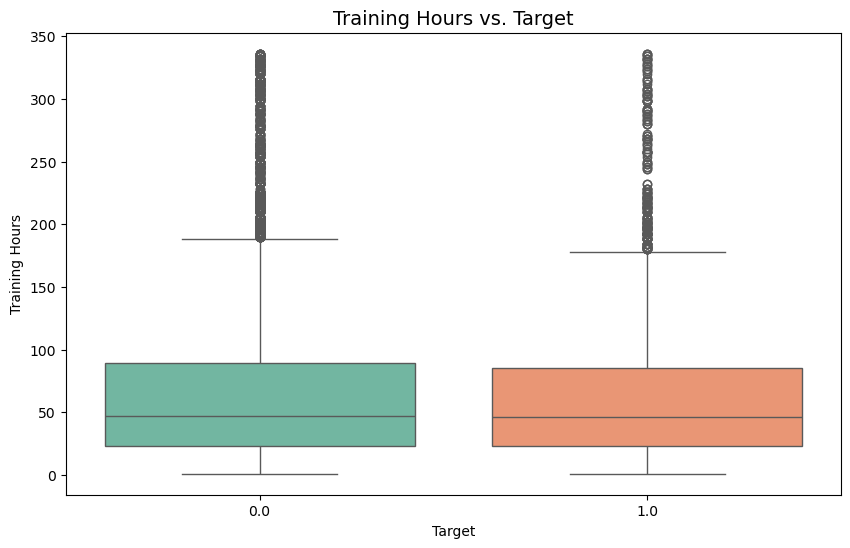

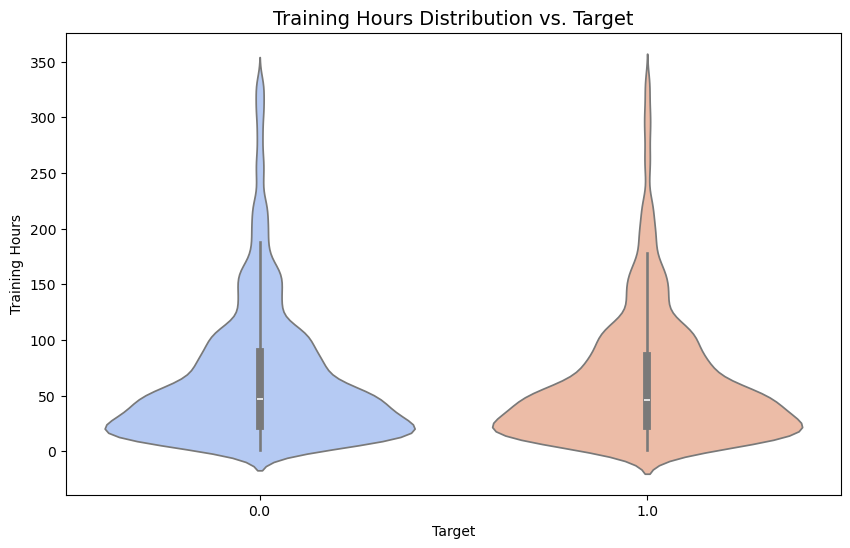

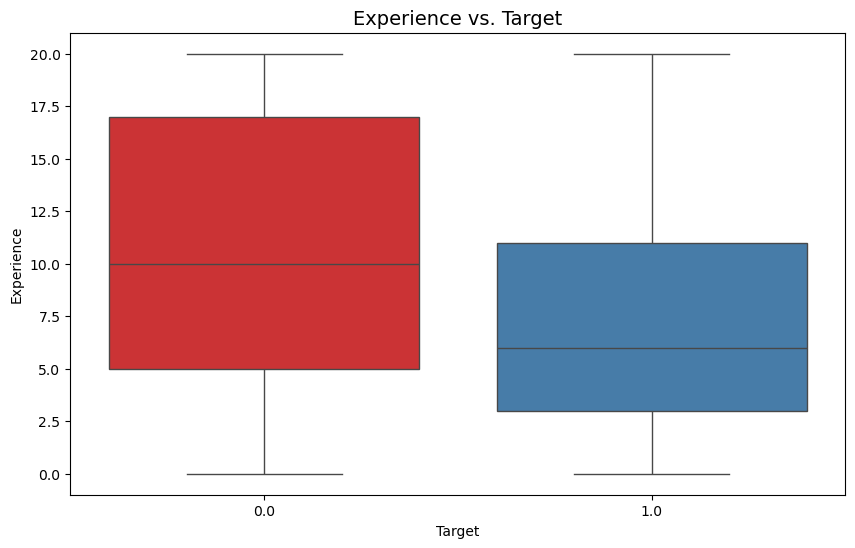

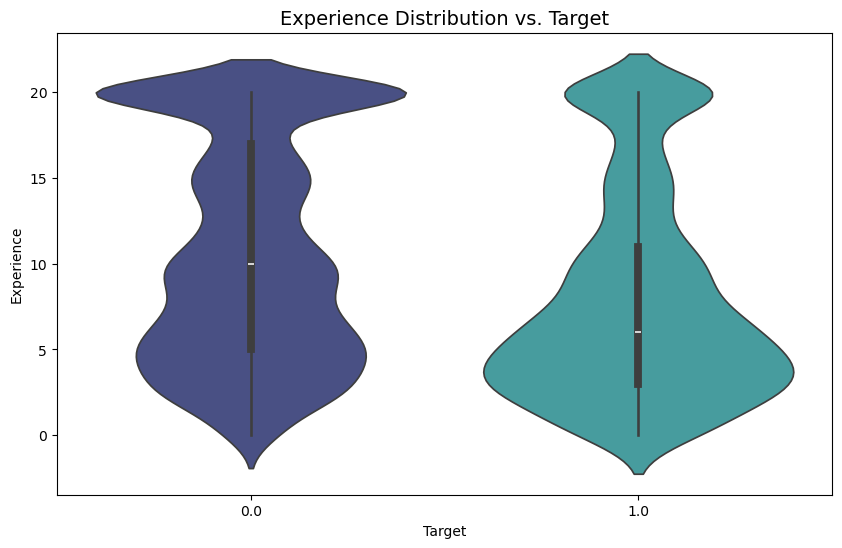

In [318]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='training_hours', data=df, palette='Set2')
plt.title("Training Hours vs. Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel("Training Hours")
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='training_hours', data=df, palette='coolwarm')
plt.title("Training Hours Distribution vs. Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel("Training Hours")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='experience', data=df, palette='Set1')
plt.title("Experience vs. Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel("Experience")
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='experience', data=df, palette='mako')
plt.title("Experience Distribution vs. Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel("Experience")
plt.show()


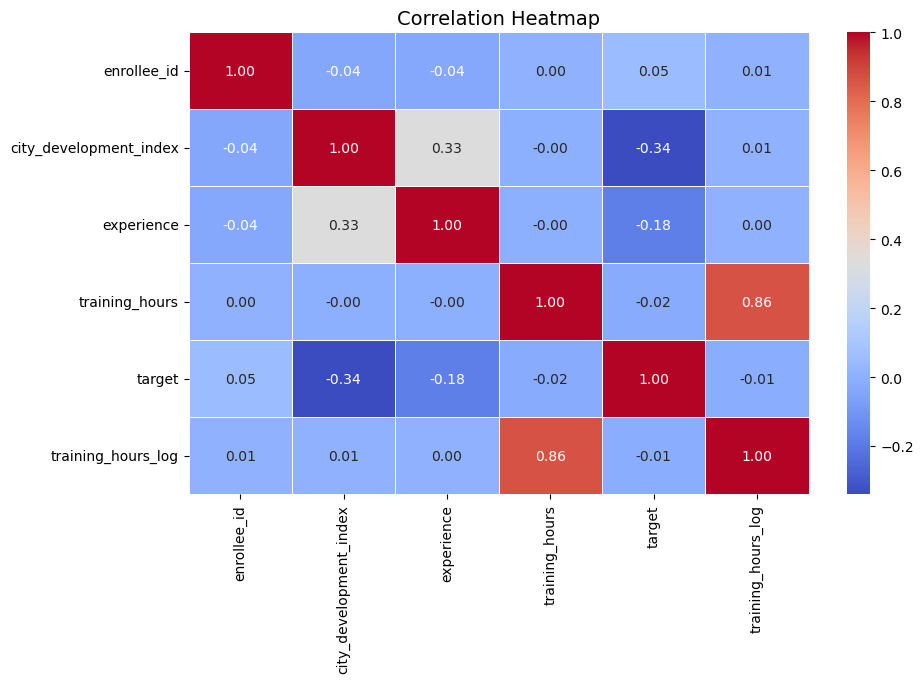

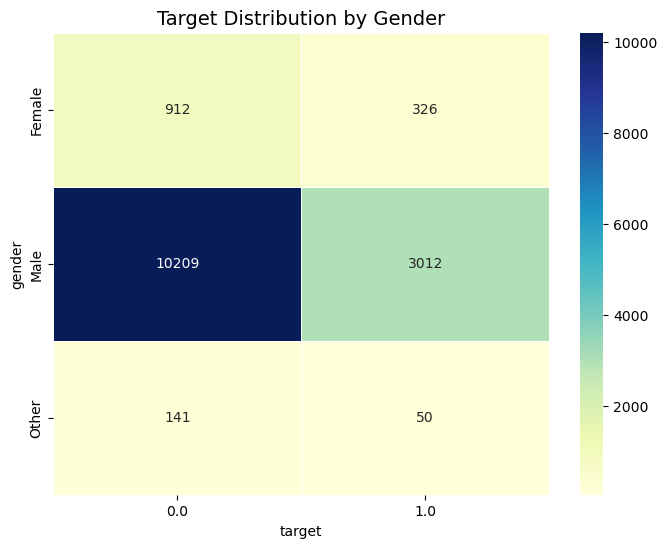

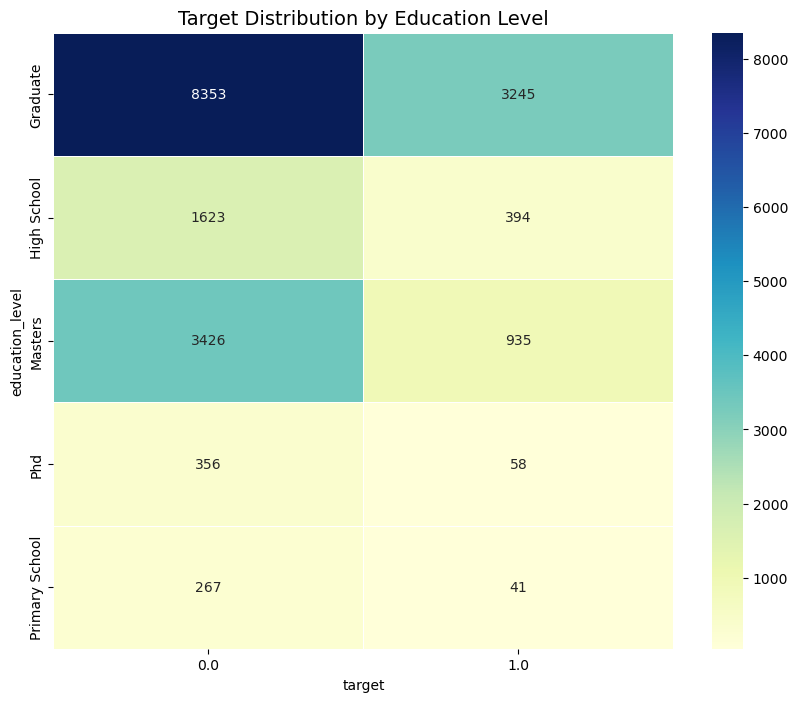

In [320]:

plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()
gender_target = df.pivot_table(index='gender', columns='target', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(gender_target, annot=True, cmap='YlGnBu', fmt="d", linewidths=0.5)
plt.title("Target Distribution by Gender", fontsize=14)
plt.show()
edu_target = df.pivot_table(index='education_level', columns='target', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(edu_target, annot=True, cmap='YlGnBu', fmt="d", linewidths=0.5)
plt.title("Target Distribution by Education Level", fontsize=14)
plt.show()
